**Задача:**

К вам приходит руководитель продукта “Интернет-магазин” и спрашивает про удержание клиентов и повторные покупки.
У него есть опасение, что из-за проблем с доставкой товаров в магазине у нас стали больше оттекать пользователи.
Он просит вас сравнить, на сколько сейчас все хуже, чем в прошлом году? 

Доступные данные:

транзакции (покупки) в интернет магазине, в том числе id клиента, id покупки, timestamp покупки и тп

orders.csv, customers.csv

**Задача:**

Проверить гипотезу руководителя продукта. 
Дать руководителю продукта инструмент для самостоятельного принятия решений по качеству удержания пользовательской базы

**Решение.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Считываем данные

In [3]:
customers = pd.read_csv('customers.csv')
orders = pd.read_csv('orders.csv')

In [4]:
customers

,id,name,segment,state,city
0,CG-12520,Claire Gute,Consumer,Kentucky,Henderson
1,DV-13045,Darrin Van Huff,Corporate,California,Los Angeles
2,SO-20335,Sean O'Donnell,Consumer,Florida,Fort Lauderdale
3,BH-11710,Brosina Hoffman,Consumer,California,Los Angeles
4,AA-10480,Andrew Allen,Consumer,North Carolina,Concord
...,...,...,...,...,...
788,CJ-11875,Carl Jackson,Corporate,Pennsylvania,Philadelphia
789,RS-19870,Roy Skaria,Home Office,Iowa,Burlington
790,SC-20845,Sung Chung,Consumer,Illinois,Arlington Heights
791,RE-19405,Ricardo Emerson,Consumer,Ohio,Kent


In [5]:
orders

,id,order_date,ship_mode,customer_id,sales
0,100006,2014-09-07,Standard,DK-13375,377.970
1,100090,2014-07-08,Standard,EB-13705,699.192
2,100293,2014-03-14,Standard,NF-18475,91.056
3,100328,2014-01-28,Standard,JC-15340,3.928
4,100363,2014-04-08,Standard,JM-15655,21.376
...,...,...,...,...,...
5004,168802,2017-11-03,Standard,JO-15145,18.368
5005,169320,2017-07-23,Second,LH-16900,171.430
5006,169488,2017-09-07,First,AA-10375,56.860
5007,169502,2017-08-28,Standard,MG-17650,113.410


## Посмотрим к каким сегментам принадлежат пользователи:

In [6]:
customers['segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

## Отсортируем по убыванию значения в колонке 'order_date' таблицы orders, чтобы определить временной промежуток, нужный нам для проверки гипотезы. 

In [7]:
orders.sort_values('order_date', ascending=False)

,id,order_date,ship_mode,customer_id,sales
3663,143259,2017-12-30,Standard,PO-18865,466.842
3928,156720,2017-12-30,Standard,JM-15580,3.024
3328,126221,2017-12-30,Standard,CC-12430,209.300
3097,115427,2017-12-30,Standard,EB-13975,34.624
3740,146626,2017-12-29,Standard,BP-11185,101.120
...,...,...,...,...,...
776,167199,2014-01-06,Standard,ME-17320,4374.880
83,106054,2014-01-06,First,JO-15145,12.780
511,141817,2014-01-05,Standard,MB-18085,19.536
161,112326,2014-01-04,Standard,PO-19195,288.060


   Видим, что последние заказы были совершены в 2017 году. Следовательно,
   ## Проверяемая гипотеза: Retention rate в 2017 году <  Retention rate в 2016 году

In [9]:
customers = customers.rename(columns={'id':'customer_id'}) 
customers

,customer_id,name,segment,state,city
0,CG-12520,Claire Gute,Consumer,Kentucky,Henderson
1,DV-13045,Darrin Van Huff,Corporate,California,Los Angeles
2,SO-20335,Sean O'Donnell,Consumer,Florida,Fort Lauderdale
3,BH-11710,Brosina Hoffman,Consumer,California,Los Angeles
4,AA-10480,Andrew Allen,Consumer,North Carolina,Concord
...,...,...,...,...,...
788,CJ-11875,Carl Jackson,Corporate,Pennsylvania,Philadelphia
789,RS-19870,Roy Skaria,Home Office,Iowa,Burlington
790,SC-20845,Sung Chung,Consumer,Illinois,Arlington Heights
791,RE-19405,Ricardo Emerson,Consumer,Ohio,Kent


       Объединим таблицы orders и customers по полю "customer_id"

In [11]:
df = pd.merge(orders, customers)
df

,id,order_date,ship_mode,customer_id,sales,name,segment,state,city
0,100006,2014-09-07,Standard,DK-13375,377.970,Dennis Kane,Consumer,Ohio,Marion
1,131884,2015-12-06,Same Day,DK-13375,594.002,Dennis Kane,Consumer,Ohio,Marion
2,145065,2015-12-12,First,DK-13375,32.308,Dennis Kane,Consumer,Ohio,Marion
3,133046,2017-07-27,Second,DK-13375,297.990,Dennis Kane,Consumer,Ohio,Marion
4,165099,2017-12-11,First,DK-13375,1.392,Dennis Kane,Consumer,Ohio,Marion
...,...,...,...,...,...,...,...,...,...
5004,168193,2017-03-06,Second,RM-19750,98.350,Roland Murray,Consumer,New York,New York City
5005,122140,2015-04-02,Standard,MO-17950,130.288,Michael Oakman,Consumer,Texas,Dallas
5006,166233,2017-07-03,Standard,MO-17950,24.000,Michael Oakman,Consumer,Texas,Dallas
5007,160150,2015-07-19,First,TS-21085,2.025,Thais Sissman,Consumer,Arizona,Phoenix


In [19]:
df.drop_duplicates(subset=['name'])

,id,order_date,ship_mode,customer_id,sales,name,segment,state,city
0,100006,2014-09-07,Standard,DK-13375,377.970,Dennis Kane,Consumer,Ohio,Marion
8,100090,2014-07-08,Standard,EB-13705,699.192,Ed Braxton,Corporate,Ohio,Akron
17,100293,2014-03-14,Standard,NF-18475,91.056,Neil Franzosisch,Home Office,Illinois,Rockford
21,100328,2014-01-28,Standard,JC-15340,3.928,Jasper Cacioppo,Consumer,California,Los Angeles
25,100363,2014-04-08,Standard,JM-15655,21.376,Jim Mitchum,Corporate,New Jersey,Bridgeton
...,...,...,...,...,...,...,...,...,...
4998,128755,2017-05-04,Standard,MK-18160,629.860,Mike Kennedy,Consumer,Florida,Jacksonville
5002,148691,2017-12-03,Standard,CS-12460,238.684,Chuck Sachs,Consumer,Georgia,Columbus
5004,168193,2017-03-06,Second,RM-19750,98.350,Roland Murray,Consumer,New York,New York City
5005,122140,2015-04-02,Standard,MO-17950,130.288,Michael Oakman,Consumer,Texas,Dallas


**Посмотрим на объемы продаж за последние два года**

In [20]:
orders1 = orders.drop(labels=np.arange(1700)) #тк с 1700 строки начинаются данные о заказах 2016 года

In [21]:
orders1.reset_index()
orders1.reset_index(drop=True)

,id,order_date,ship_mode,customer_id,sales
0,100083,2016-11-24,Standard,CD-11980,24.784
1,100153,2016-12-13,Standard,KH-16630,63.880
2,100244,2016-09-20,Standard,GM-14695,475.694
3,100300,2016-06-24,Second,MJ-17740,4823.090
4,100307,2016-12-15,Standard,TC-21475,19.440
...,...,...,...,...,...
3304,168802,2017-11-03,Standard,JO-15145,18.368
3305,169320,2017-07-23,Second,LH-16900,171.430
3306,169488,2017-09-07,First,AA-10375,56.860
3307,169502,2017-08-28,Standard,MG-17650,113.410


In [22]:
merged_1617 = pd.merge(orders1, customers) #за 2016 и 2017 гг.

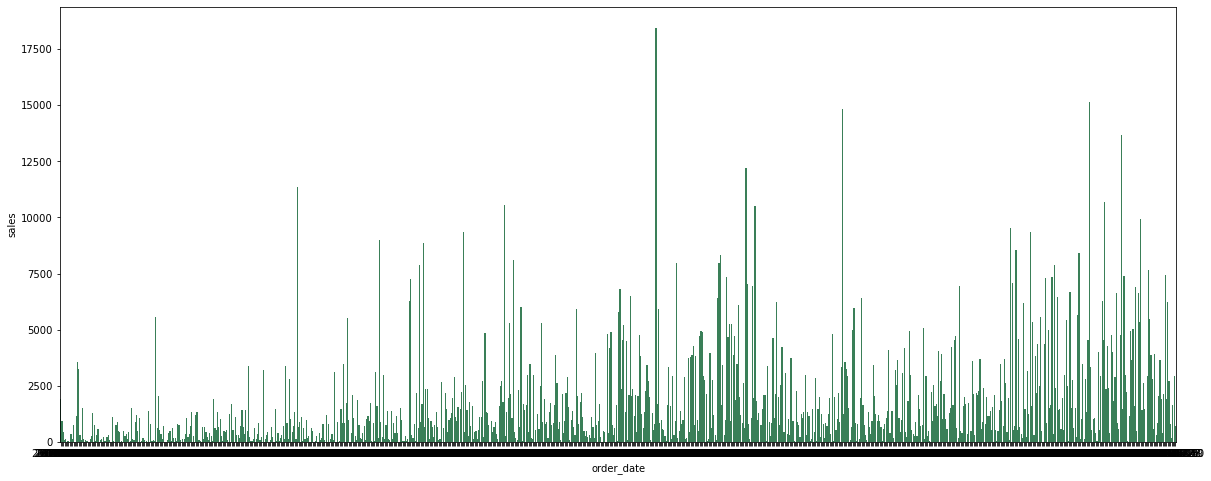

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(20,8))
sales_by_month = merged_1617.groupby(['order_date'], as_index=False).agg({'sales': pd.Series.sum})
sns.barplot(data=sales_by_month, x='order_date', y='sales', color='seagreen')
plt.show()

По графику видим, что объем продаж за последний год увеличился в сравнении с предыдущим. 

In [11]:
merged_data.groupby('order_date')['sales'].describe()

,count,mean,std,min,25%,50%,75%,max
order_date,,,,,,,,
2014-01-03,1.0,16.448000,NaN,16.448,16.448,16.4480,16.4480,16.448
2014-01-04,1.0,288.060000,NaN,288.060,288.060,288.0600,288.0600,288.060
2014-01-05,1.0,19.536000,NaN,19.536,19.536,19.5360,19.5360,19.536
2014-01-06,3.0,1469.033333,2516.539236,12.780,16.110,19.4400,2197.1600,4374.880
2014-01-07,1.0,87.158000,NaN,87.158,87.158,87.1580,87.1580,87.158
...,...,...,...,...,...,...,...,...
2017-12-26,4.0,203.648500,365.102275,3.132,12.807,30.3910,221.2325,750.680
2017-12-27,1.0,177.636000,NaN,177.636,177.636,177.6360,177.6360,177.636
2017-12-28,10.0,165.735080,219.474624,1.188,37.481,114.2754,132.3880,725.840


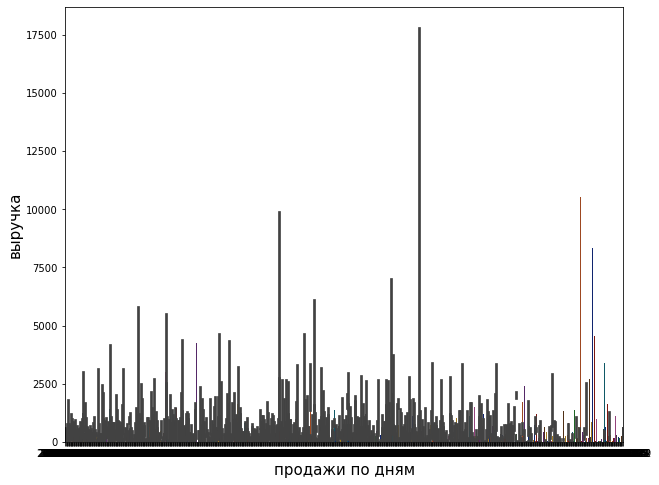

In [14]:
plt.rcParams['figure.figsize'] = (10, 8)
sns.barplot(x = merged_1617['order_date'], y = merged_data['sales'], palette ='dark')
plt.xlabel('продажи по дням', fontsize = 15)
plt.ylabel('выручка', fontsize = 15)
plt.show()

Теперь посмотрим, что происходит с retention rate в интересующий нас период. 

In [23]:
df['year'] = pd.DatetimeIndex(df['order_date']).year
df['month'] = pd.DatetimeIndex(df['order_date']).month

In [24]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['week'] = df.order_date.dt.strftime('%W').astype('int')

In [25]:
df = df[df['year'] >= 2016]

In [29]:
cohorts= df.groupby('customer_id',as_index=False)['invoice_month'].min()
cohorts.rename(columns = {'invoice_month':'cohort'},inplace=True)
cohorts.head()

,customer_id,cohort
0,AA-10315,2016-03
1,AA-10375,2016-07
2,AA-10480,2016-07
3,AA-10645,2016-07
4,AB-10015,2016-11


In [30]:
df_merged= pd.merge(df,cohorts , how='left', on='customer_id')
df_merged.head()

,id,order_date,ship_mode,customer_id,sales,name,segment,state,city,year,month,week,invoice_month,order_month,cohort
0,133046,2017-07,Second,DK-13375,297.990,Dennis Kane,Consumer,Ohio,Marion,2017,7,30,2017-07,2017-07,2016-07
1,165099,2017-12,First,DK-13375,1.392,Dennis Kane,Consumer,Ohio,Marion,2017,12,50,2017-12,2017-12,2016-07
2,166835,2017-11,Second,DK-13375,221.024,Dennis Kane,Consumer,Ohio,Marion,2017,11,45,2017-11,2017-11,2016-07
3,111290,2016-07,Standard,DK-13375,1137.400,Dennis Kane,Consumer,Ohio,Marion,2016,7,29,2016-07,2016-07,2016-07
4,139087,2016-07,Second,DK-13375,656.400,Dennis Kane,Consumer,Ohio,Marion,2016,7,28,2016-07,2016-07,2016-07


In [32]:
def cohort_period(df):
    """
    Creates column CohortPeriod
    """
    df['CohortPeriod'] = np.arange(len(df))
    return df

In [33]:
cohorts_group = df_merged.groupby(['cohort', 'invoice_month']).agg({'customer_id': pd.Series.nunique})
cohorts_group.rename(columns={'customer_id': 'TotalUsers',
                        'order_id': 'TotalOrders'}, inplace=True)
cohorts_group = cohorts_group.groupby(level=0).apply(cohort_period)
cohorts_group.reset_index(inplace=True)
cohorts_group.set_index(['cohort', 'CohortPeriod'], inplace=True) 
cohort_group_size = cohorts_group['TotalUsers'].groupby(level=0).first()
user_retention = cohorts_group['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)

In [34]:
user_retention.T

CohortPeriod,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
cohort,,,,,,,,,,,,,,,,,,,,,
2016-01,1.0,0.021739,0.043478,0.086957,0.108696,0.108696,0.130435,0.086957,0.173913,0.130435,...,0.173913,0.130435,0.195652,0.152174,0.130435,0.130435,0.173913,0.130435,0.239130,0.23913
2016-02,1.0,0.073171,0.073171,0.048780,0.146341,0.097561,0.048780,0.170732,0.170732,0.121951,...,0.097561,0.146341,0.146341,0.243902,0.170732,0.365854,0.170732,0.292683,0.195122,NaN
2016-03,1.0,0.106667,0.146667,0.160000,0.146667,0.080000,0.253333,0.120000,0.186667,0.240000,...,0.200000,0.200000,0.066667,0.120000,0.293333,0.200000,0.253333,0.266667,NaN,NaN
2016-04,1.0,0.147059,0.102941,0.147059,0.132353,0.308824,0.117647,0.161765,0.235294,0.102941,...,0.161765,0.088235,0.088235,0.294118,0.073529,0.235294,0.323529,NaN,NaN,NaN
2016-05,1.0,0.088235,0.147059,0.073529,0.279412,0.147059,0.279412,0.161765,0.088235,0.044118,...,0.088235,0.147059,0.235294,0.161765,0.308824,0.220588,NaN,NaN,NaN,NaN
2016-06,1.0,0.074074,0.074074,0.277778,0.129630,0.240741,0.240741,0.037037,0.018519,0.185185,...,0.111111,0.203704,0.203704,0.277778,0.222222,NaN,NaN,NaN,NaN,NaN
2016-07,1.0,0.136364,0.295455,0.068182,0.181818,0.204545,0.045455,0.090909,0.068182,0.159091,...,0.181818,0.159091,0.295455,0.272727,NaN,NaN,NaN,NaN,NaN,NaN
2016-08,1.0,0.180000,0.080000,0.160000,0.100000,0.040000,0.120000,0.080000,0.200000,0.160000,...,0.180000,0.320000,0.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09,1.0,0.046154,0.230769,0.138462,0.107692,0.076923,0.169231,0.153846,0.153846,0.107692,...,0.246154,0.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


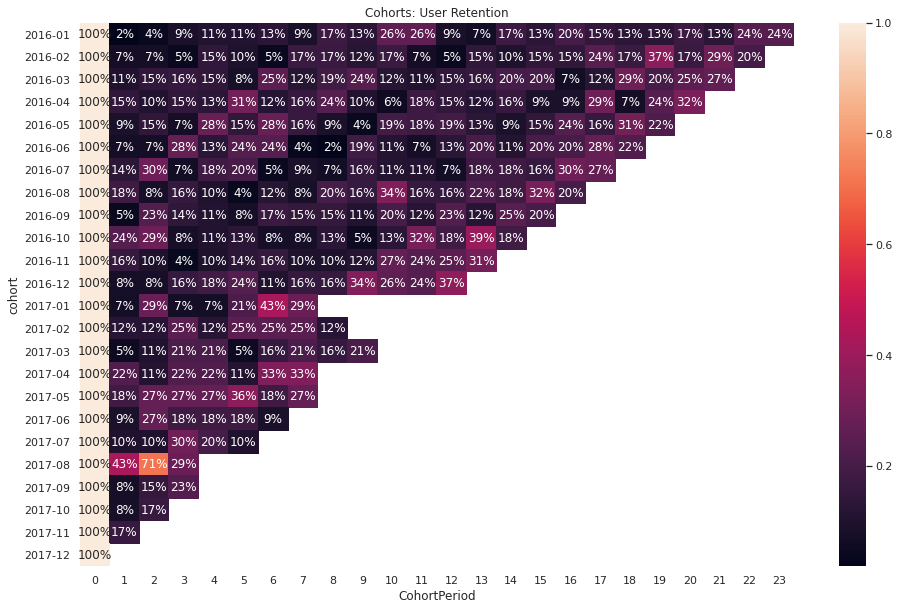

In [35]:
sns.set(style='white')
plt.figure(figsize=(16, 10))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%');

Наблюдаем увеличение retention rate в 2017 году по сравнению с 2016 годом. 

## Выводы: 

    1) когортный анализ показал увеличение retention rate в 2017 году по сравнению с 2016 годом; 
    
    2) объем продаж за последний год также увеличился в сравнении с предыдущим.
Следовательно, гипотеза руководителя продукта отклоняется. 

В качестве **инструмента** для самостоятельного принятия решений по качеству удержания пользовательской базы руководителю продукта мы предлагаем использовать карты retention rate, построенные описанным выше способом, и карту вовлеченности потребителя.